In [7]:
# USing k-means for customer segmentation to understand how the customer demographics have been distributed based on the attributes for analysis

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Importing the input datasets

In [10]:
transaction_backup = pd.read_csv('G:/Internship/KPMG/Data Quality Assessment/INPUT/transactions.csv')

In [11]:
cust_addr_backup = pd.read_csv('G:/Internship/KPMG/Data Quality Assessment/INPUT/customeraddress.csv')
cust_demo_backup = pd.read_csv('G:/Internship/KPMG/Data Quality Assessment/INPUT/customerdemographics.csv')

In [12]:
# Taking a backup of the input dataframes 

In [13]:
transaction = transaction_backup.copy()

In [14]:
cust_addr = cust_addr_backup.copy()

In [15]:
cust_demo = cust_demo_backup.copy()

In [16]:
# General data exploration

In [17]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [18]:
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19821 entries, 0 to 19820
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19821 non-null  int64  
 1   customer_id    19821 non-null  int64  
 2   online_order   19821 non-null  object 
 3   order_status   19821 non-null  object 
 4   brand          19821 non-null  object 
 5   product_line   19821 non-null  object 
 6   product_class  19821 non-null  object 
 7   product_size   19821 non-null  object 
 8   list_price     19821 non-null  float64
 9   standard_cost  19821 non-null  float64
 10  profit         19821 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.7+ MB


In [19]:
cust_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [20]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [21]:
# Dropping unnecessary columns for k means as k means works only on continuous variables all discrete variables are dropped

In [22]:
cust_addr = cust_addr.drop(columns = ['address','state','postcode','country'],axis = 1)

In [23]:
cust_demo = cust_demo.drop(columns = ['first_name','last_name','gender','job_title','job_industry_category','wealth_segment','deceased_indicator','default','owns_car'], axis = 1)

In [24]:
# Handling an erronous data in cust_demo dataframe

In [25]:
cust_demo['DOB'] = cust_demo['DOB'].str.replace('1843-12-21','1931-10-23')

In [26]:
# Merging the remaining columns of the 2 dataframes

In [27]:
cust_u = pd.merge(cust_demo,cust_addr,how = 'inner')

In [28]:
customer = cust_u.copy()

In [29]:
cust_u

,customer_id,past_3_years_bike_related_purchases,DOB,tenure,property_valuation
0,1,93,12-10-1953,11.0,10
1,2,81,16-12-1980,16.0,10
2,4,33,03-10-1961,7.0,9
3,5,56,13-05-1977,8.0,4
4,6,35,16-09-1966,13.0,9
...,...,...,...,...,...
3991,3996,8,09-08-1975,19.0,6
3992,3997,87,13-07-2001,1.0,2
3993,3998,60,NaN,NaN,6
3994,3999,11,24-10-1973,10.0,3


In [30]:
# Feature Engineering 1 - Creating a field 'Age' from DOB column

In [31]:
cust_u['Age'] = (pd.to_datetime('31-12-2017') - pd.to_datetime(cust_u['DOB']))/np.timedelta64(1,'Y')


In [32]:
cust_u = cust_u.drop('DOB',axis = 1)

In [33]:
cust_u['Age'] = np.round(cust_u['Age'])

In [34]:
cust_u = cust_u.drop('customer_id',axis = 1)

In [35]:
# Missing values are found out

In [36]:
cust_u['tenure'].isnull().sum()

87

In [37]:
cust_u['Age'].isnull().sum()

87

In [38]:
cust_u['Age'].describe()

count    3909.000000
mean       40.438219
std        12.634621
min        15.000000
25%        31.000000
50%        41.000000
75%        50.000000
max        86.000000
Name: Age, dtype: float64

In [39]:
# Imputation of missing data using 50th percentile

In [40]:
cust_u['Age'].fillna(41 ,inplace = True)

In [41]:
cust_u['tenure'].describe()

count    3909.000000
mean       10.655922
std         5.658533
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [42]:
# Imputation of missing data using 50th percentile

In [43]:
cust_u['tenure'].fillna(11 ,inplace = True)

In [44]:
cust_u

,past_3_years_bike_related_purchases,tenure,property_valuation,Age
0,93,11.0,10,64.0
1,81,16.0,10,37.0
2,33,7.0,9,57.0
3,56,8.0,4,41.0
4,35,13.0,9,51.0
...,...,...,...,...
3991,8,19.0,6,42.0
3992,87,1.0,2,16.0
3993,60,11.0,6,41.0
3994,11,10.0,3,44.0


In [45]:
# Scaling of dataset so that dat with different ranges could be compared

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
cust_u = scaler.fit_transform(cust_u)

In [49]:
cust_u

array([[ 1.53612532,  0.06014658,  0.87997244,  1.88471847],
       [ 1.11831318,  0.9536252 ,  0.87997244, -0.27614659],
       [-0.55293541, -0.65463631,  0.52599923,  1.3244942 ],
       ...,
       [ 0.38714192,  0.06014658, -0.5359204 ,  0.04398157],
       [-1.31892435, -0.11854914, -1.59784004,  0.28407769],
       [ 0.94422478,  0.06014658, -0.5359204 , -1.07646698]])

In [50]:
cust_u = pd.DataFrame(cust_u)

In [51]:
cust_u.columns = ['past_3_years_bike_related_purchases','tenure','property_valuation','Age']

In [52]:
cust_u

,past_3_years_bike_related_purchases,tenure,property_valuation,Age
0,1.536125,0.060147,0.879972,1.884718
1,1.118313,0.953625,0.879972,-0.276147
2,-0.552935,-0.654636,0.525999,1.324494
3,0.247871,-0.475941,-1.243867,0.043982
4,-0.483300,0.417538,0.525999,0.844302
...,...,...,...,...
3991,-1.423377,1.489712,-0.535920,0.124014
3992,1.327219,-1.726811,-1.951813,-1.956819
3993,0.387142,0.060147,-0.535920,0.043982
3994,-1.318924,-0.118549,-1.597840,0.284078


In [53]:
# Kmeans clustering - finding out k value i.e the number of clusters - by determining which k value will minimize distance between clusters(WCSS) maximum level

In [54]:
from sklearn.cluster import KMeans

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

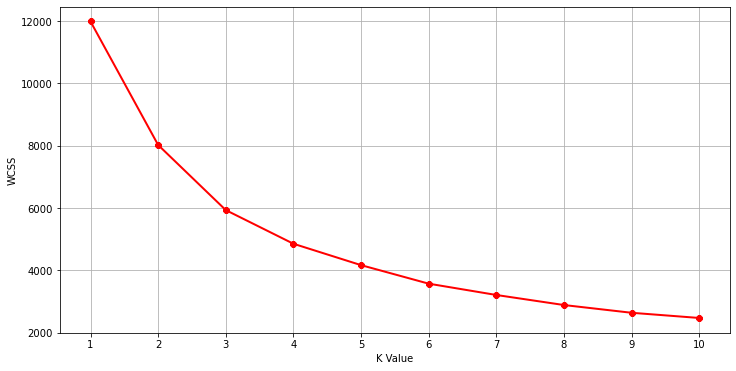

In [56]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust_u.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [57]:
# k =3 has reduced wcss toa  great extent so we the number of clusters = 3

In [58]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(cust_u)
labels = k_means.labels_


In [59]:
labels

array([2, 2, 1, ..., 2, 1, 0])

In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [61]:
# 3-dimensional between Age,property_valuation,past_3_years_bike_related_purchases 

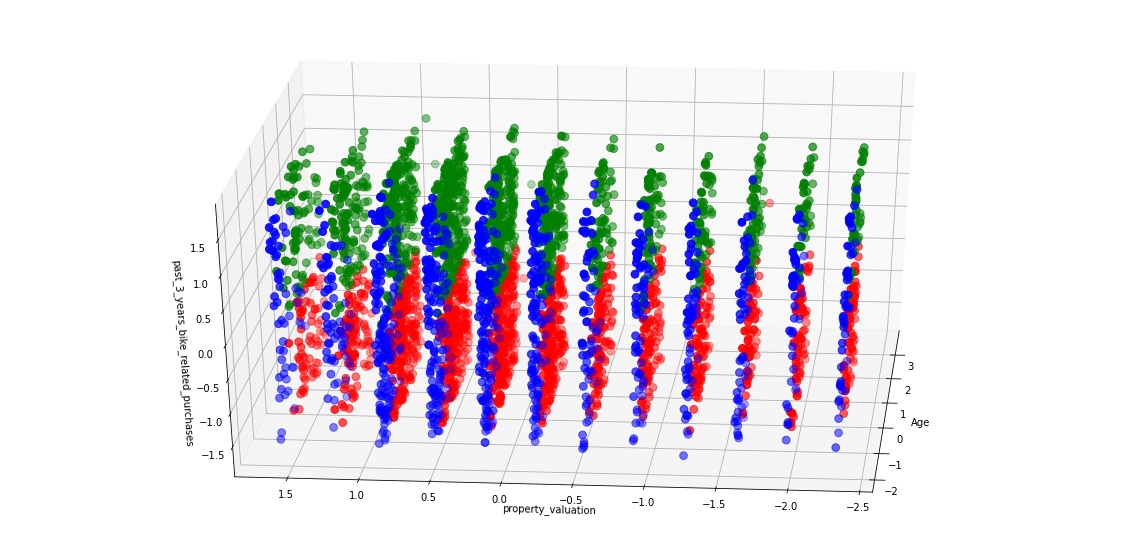

In [62]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_u.Age[labels == 0], cust_u["property_valuation"][labels == 0], cust_u["past_3_years_bike_related_purchases"][labels == 0],  c='blue', s=60)
ax.scatter(cust_u.Age[labels == 1], cust_u["property_valuation"][labels == 1], cust_u["past_3_years_bike_related_purchases"][labels == 1],  c='red', s=60)
ax.scatter(cust_u.Age[labels == 2], cust_u["property_valuation"][labels == 2], cust_u["past_3_years_bike_related_purchases"][labels == 2],  c='green', s=60)
ax.scatter(cust_u.Age[labels == 3], cust_u["property_valuation"][labels == 3], cust_u["past_3_years_bike_related_purchases"][labels == 3],  c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("property_valuation")
ax.set_zlabel('past_3_years_bike_related_purchases')
plt.show()

In [63]:
# 3-dimensional between Age,tenure,past_3_years_bike_related_purchases 

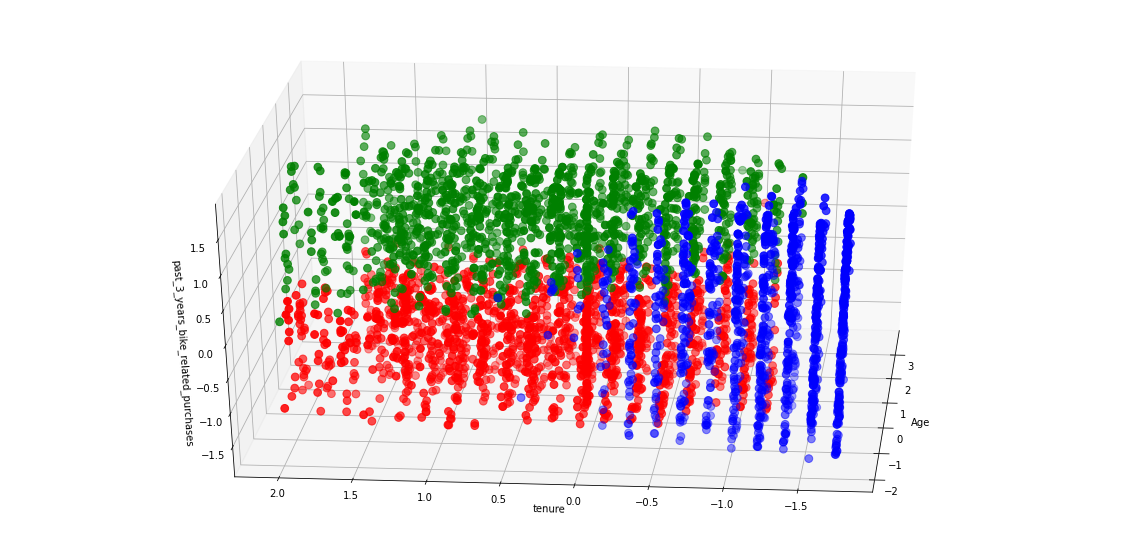

In [64]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_u.Age[labels == 0], cust_u["tenure"][labels == 0], cust_u["past_3_years_bike_related_purchases"][labels == 0],  c='blue', s=60)
ax.scatter(cust_u.Age[labels == 1], cust_u["tenure"][labels == 1], cust_u["past_3_years_bike_related_purchases"][labels == 1],  c='red', s=60)
ax.scatter(cust_u.Age[labels == 2], cust_u["tenure"][labels == 2], cust_u["past_3_years_bike_related_purchases"][labels == 2],  c='green', s=60)
ax.scatter(cust_u.Age[labels == 3], cust_u["tenure"][labels == 3], cust_u["past_3_years_bike_related_purchases"][labels == 3],  c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("tenure")
ax.set_zlabel('past_3_years_bike_related_purchases')
plt.show()

In [65]:
# Finding 1 - Older Cusomers with high tenure do more bike related purchases
#Young customers with high tenure dont do more bike purchases

In [66]:
# 3-dimensional between Age,past_3_years_purchases,property_valuation 

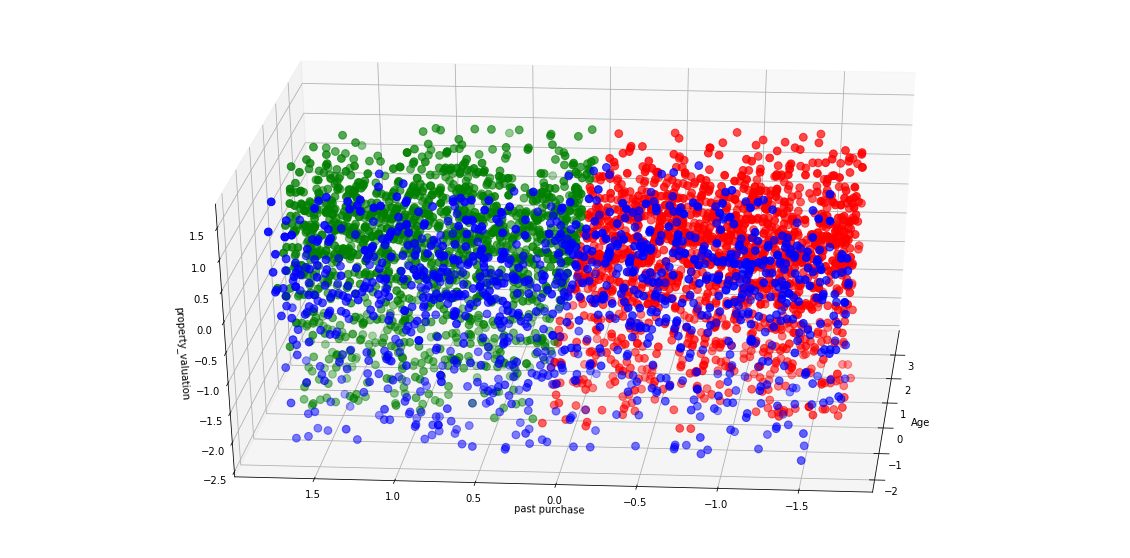

In [67]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_u.Age[labels == 0], cust_u["past_3_years_bike_related_purchases"][labels == 0], cust_u["property_valuation"][labels == 0],  c='blue', s=60)
ax.scatter(cust_u.Age[labels == 1], cust_u["past_3_years_bike_related_purchases"][labels == 1], cust_u["property_valuation"][labels == 1],  c='red', s=60)
ax.scatter(cust_u.Age[labels == 2], cust_u["past_3_years_bike_related_purchases"][labels == 2], cust_u["property_valuation"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("past purchase")
ax.set_zlabel('property_valuation')
plt.show()

In [68]:
# Finding 2 - Customes with lesser Age, and low property_Valuation do less bike related purchase

In [69]:
# 3-dimensional between past_3_years_bike_related_purchases ,tenure,property_valuation

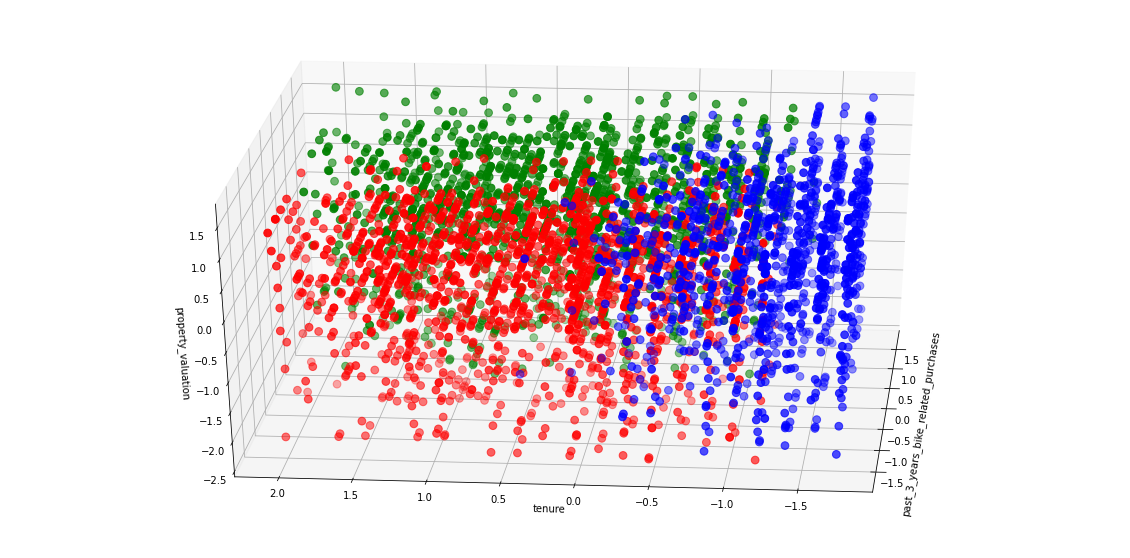

In [70]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 0], cust_u["tenure"][labels == 0], cust_u["property_valuation"][labels == 0],  c='blue', s=60)
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 1], cust_u["tenure"][labels == 1], cust_u["property_valuation"][labels == 1],  c='red', s=60)
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 2], cust_u["tenure"][labels == 2], cust_u["property_valuation"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("past_3_years_bike_related_purchases")
plt.ylabel("tenure")
ax.set_zlabel('property_valuation')
plt.show()

In [71]:
#Finding 3 - Customers with low tenure and high property valuation do more purchases

In [72]:
# 3-dimensional between past_3_years_bike_related_purchases ,property_valuation,tenure

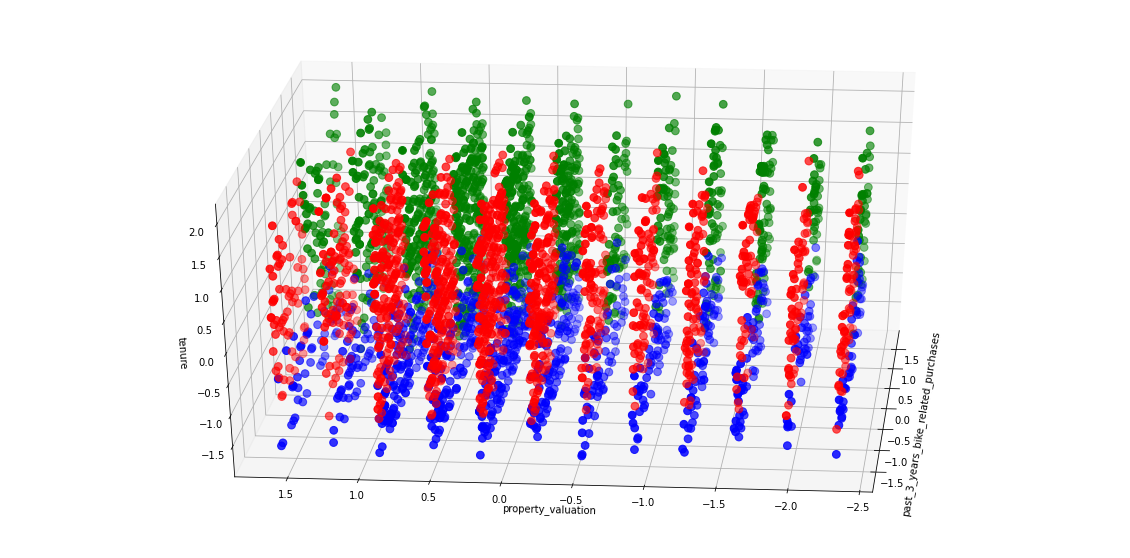

In [73]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 0], cust_u["property_valuation"][labels == 0], cust_u["tenure"][labels == 0],  c='blue', s=60)
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 1], cust_u["property_valuation"][labels == 1], cust_u["tenure"][labels == 1],  c='red', s=60)
ax.scatter(cust_u.past_3_years_bike_related_purchases[labels == 2], cust_u["property_valuation"][labels == 2], cust_u["tenure"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("past_3_years_bike_related_purchases")
plt.ylabel("property_valuation")
ax.set_zlabel('tenure')
plt.show()

In [74]:
#Finding 4 - customers with hugh property_valuation have higher chance of purchase